In [455]:
import cv2 as cv
import os
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(cv.__version__)
import HelperFile
from skimage.util import random_noise

4.4.0


In [305]:
#Function to display all the images
def show_images(images):
    n: int = len(images)
    f = plt.figure()
    for i in range(len(images)):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(cv2.cvtColor(images[i].astype('uint8'),cv2.COLOR_BGR2RGB))

    plt.show(block=True)

# Task 1

In [306]:
#Reading images into a numpy array
folder_path='images/*'
images_gray = [cv2.imread(file, 0) for file in glob.glob(folder_path)] #reading grayscale images
images_rgb = [cv2.imread(file, 1) for file in glob.glob(folder_path)]  #reading rgb images

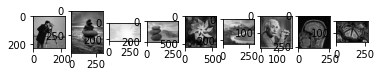

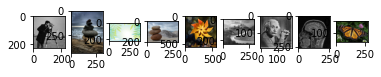

In [307]:
show_images(images_gray)
show_images(images_rgb)

# Task 2

In [349]:
def displayImage(image,title = ''):
    plt.imshow(cv2.cvtColor(image.astype('uint8'),cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [287]:
def rgbExclusion(image, band):
    img = image
    if band == 'R':
        img[:,:,2] = 0 #empty red channel
        return img
    elif band == 'G':
        img[:,:,1] = 0 #empty green channel
        return img
    elif band == 'B':
        img[:,:,0] = 0 #empty blue channel
        return img
    else:
        print("Wrong Band Name Entered")

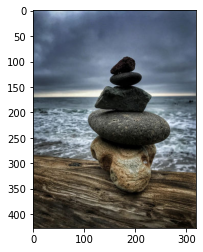

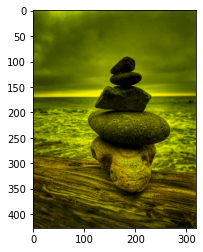

In [420]:
img_colored = images_rgb[1].copy()
displayImage(img_colored)

img = rgbExclusion(img_colored,'B')

displayImage(img)

#  Task 3

In [317]:
image1_t3 = images_gray[0] #selecting first image
image2_t3 = images_gray[1] #selecting second image
image3_t3 = images_gray[2] #selecting third image

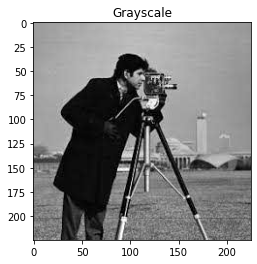

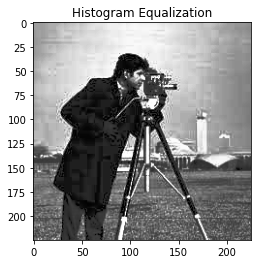

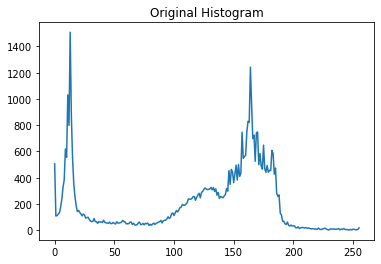

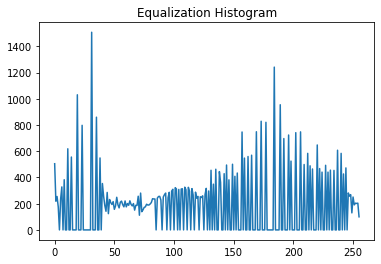

In [470]:
histr1 = cv2.calcHist([image1_t3],[0],None,[256],[0,256])  #Calculating histogram of grayscale image
equ1 = cv2.equalizeHist(image1_t3)                         #Applying histogram equalization
histr_equ1 = cv2.calcHist([equ1],[0],None,[256],[0,256])   #Calculating histogram of resultant

displayImage(image1_t3, 'Grayscale')
displayImage(equ1, 'Histogram Equalization')
plt.plot(histr1)
plt.title('Original Histogram')
plt.show()
plt.plot(histr_equ1)
plt.title('Equalization Histogram')
plt.show()

# Task 4

In [479]:
def convolve(image,kernel): #convolution function using image and kernel
    pass

In [359]:
# conv = convolve(images_rgb[2],sharpen_filter)

# Task 5

## 1 Box Filter

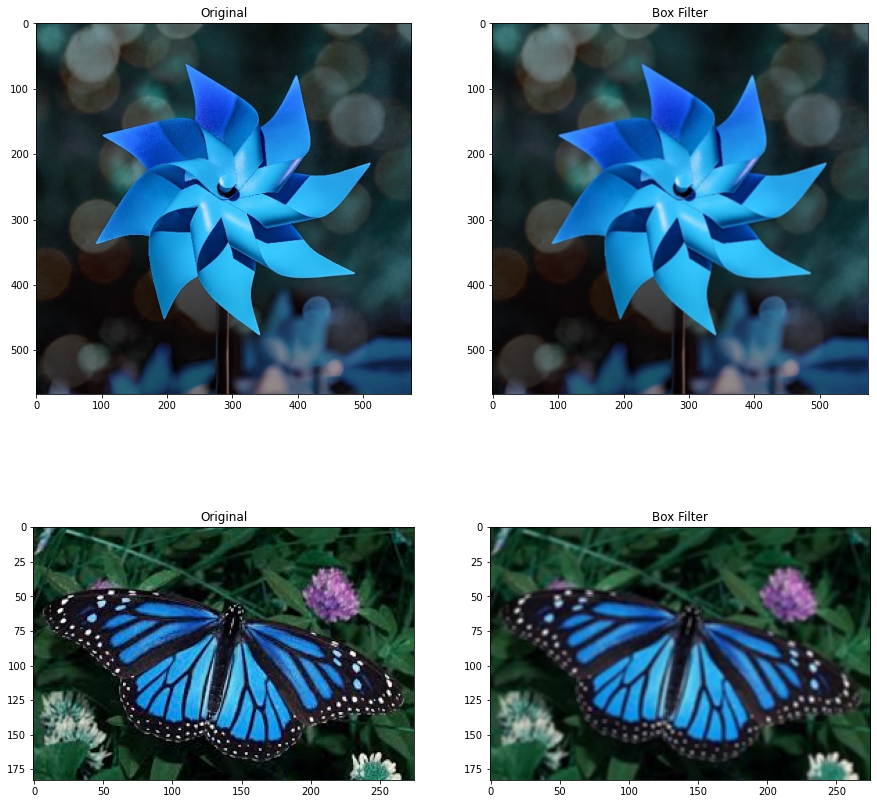

In [415]:
#First Image Box filter application
blur1_box = cv2.boxFilter(images_rgb[4],-1, (3, 3)) #Box filter
blur2_box = cv2.boxFilter(images_rgb[8],-1, (3, 3)) #Box filter

fig, axis = plt.subplots(2, 2, figsize=(15, 15))
axis[0][0].title.set_text('Original')
axis[0][0].imshow(images_rgb[4])
axis[0][1].title.set_text('Box Filter')
axis[0][1].imshow(blur1_box)
axis[1][0].title.set_text('Original')
axis[1][0].imshow(images_rgb[8])
axis[1][1].title.set_text('Box Filter')
axis[1][1].imshow(blur2_box)
plt.show()

## 2 Gaussian Filter

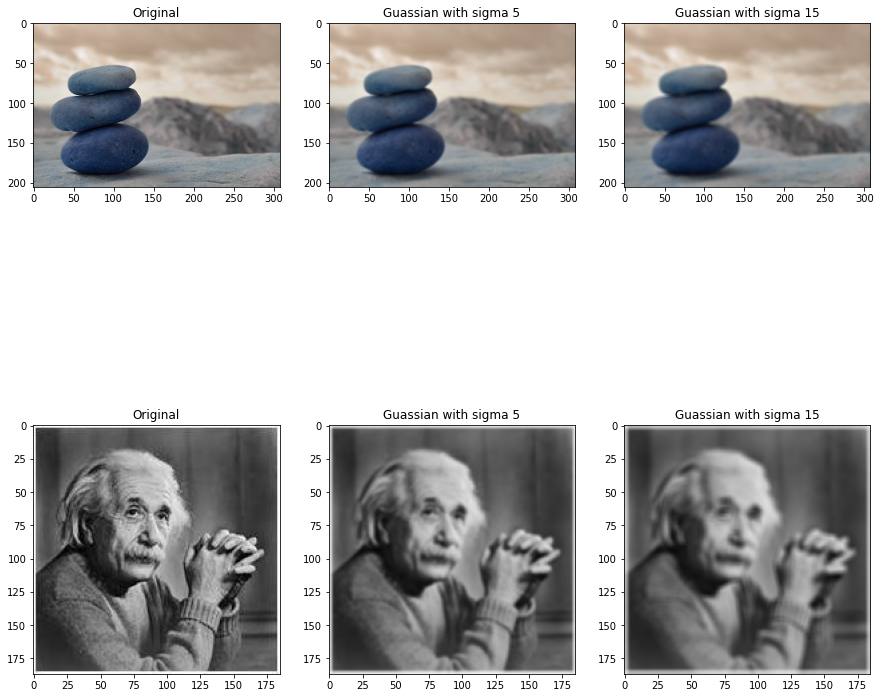

In [419]:
#First Image Gaussian application
blur1_im1 = cv.GaussianBlur(images_rgb[3],(5,5),0) #Guassian filter with sigma 5
blur2_im1 = cv.GaussianBlur(images_rgb[3],(5,5),15) #Guassian filter with sigma 15
blur1_im2 = cv.GaussianBlur(images_rgb[6],(5,5),0) #Guassian filter with sigma 5
blur2_im2 = cv.GaussianBlur(images_rgb[6],(5,5),15) #Guassian filter with sigma 15

fig, axis = plt.subplots(2, 3, figsize=(15, 15))
axis[0][0].title.set_text('Original')
axis[0][0].imshow(images_rgb[3])
axis[0][1].title.set_text('Guassian with sigma 5')
axis[0][1].imshow(blur1_im1)
axis[0][2].title.set_text('Guassian with sigma 15')
axis[0][2].imshow(blur2_im1)
axis[1][0].title.set_text('Original')
axis[1][0].imshow(images_rgb[6])
axis[1][1].title.set_text('Guassian with sigma 5')
axis[1][1].imshow(blur1_im2)
axis[1][2].title.set_text('Guassian with sigma 15')
axis[1][2].imshow(blur2_im2)
plt.show()

## 3 Gaussian and salt and pepper noise

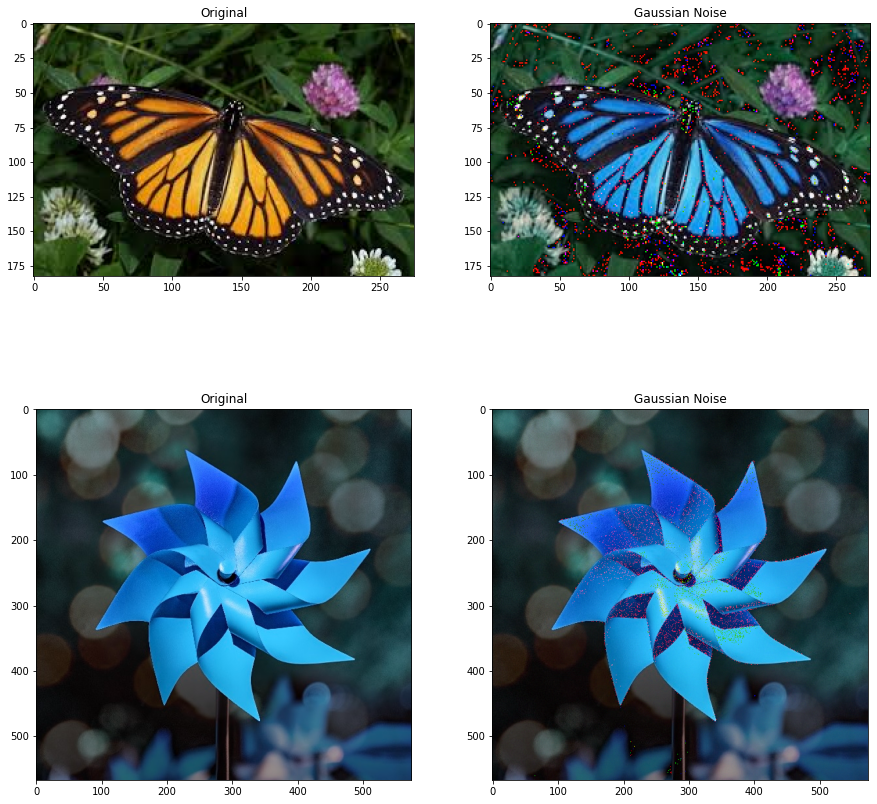

In [478]:
#Gaussian Noise
gauss1 = np.random.normal(0, 1.5, (images_rgb[8].shape[0],images_rgb[8].shape[1], images_rgb[8].shape[2])) 
noisy_image1 = images_rgb[8] + gauss1
gauss2 = np.random.normal(0, 1.5, (images_rgb[4].shape[0],images_rgb[4].shape[1], images_rgb[4].shape[2])) 
noisy_image2 = images_rgb[4] + gauss2
fig, axis = plt.subplots(2, 2, figsize=(15, 15))
axis[0][0].title.set_text('Original')
axis[0][0].imshow(cv2.cvtColor(images_rgb[8].astype('uint8'),cv2.COLOR_BGR2RGB))
axis[0][1].title.set_text('Gaussian Noise')
axis[0][1].imshow(noisy_image.astype('uint8'))
axis[1][0].title.set_text('Original')
axis[1][0].imshow(images_rgb[4])
axis[1][1].title.set_text('Gaussian Noise')
axis[1][1].imshow(noisy_image2.astype('uint8'))
plt.show()


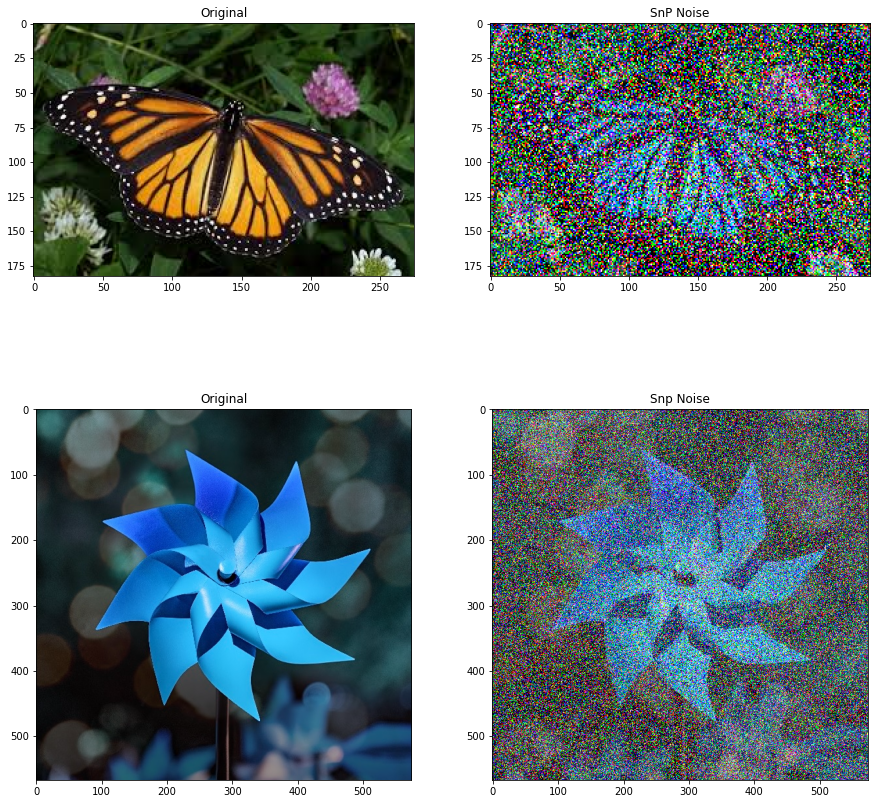

In [477]:
#Salt and Pepper Noise
noise_snp1 = random_noise(images_rgb[8].copy(), mode='s&p',amount=0.5)
noise_snp2 = random_noise(images_rgb[4].copy(), mode='s&p',amount=0.5)
fig, axis = plt.subplots(2, 2, figsize=(15, 15))
axis[0][0].title.set_text('Original')
axis[0][0].imshow(cv2.cvtColor(images_rgb[8].astype('uint8'),cv2.COLOR_BGR2RGB))
axis[0][1].title.set_text('SnP Noise')
axis[0][1].imshow(noise_snp1)
axis[1][0].title.set_text('Original')
axis[1][0].imshow(images_rgb[4])
axis[1][1].title.set_text('Snp Noise')
axis[1][1].imshow(noise_snp2)
plt.show()


## 4 Median Blur/Filter

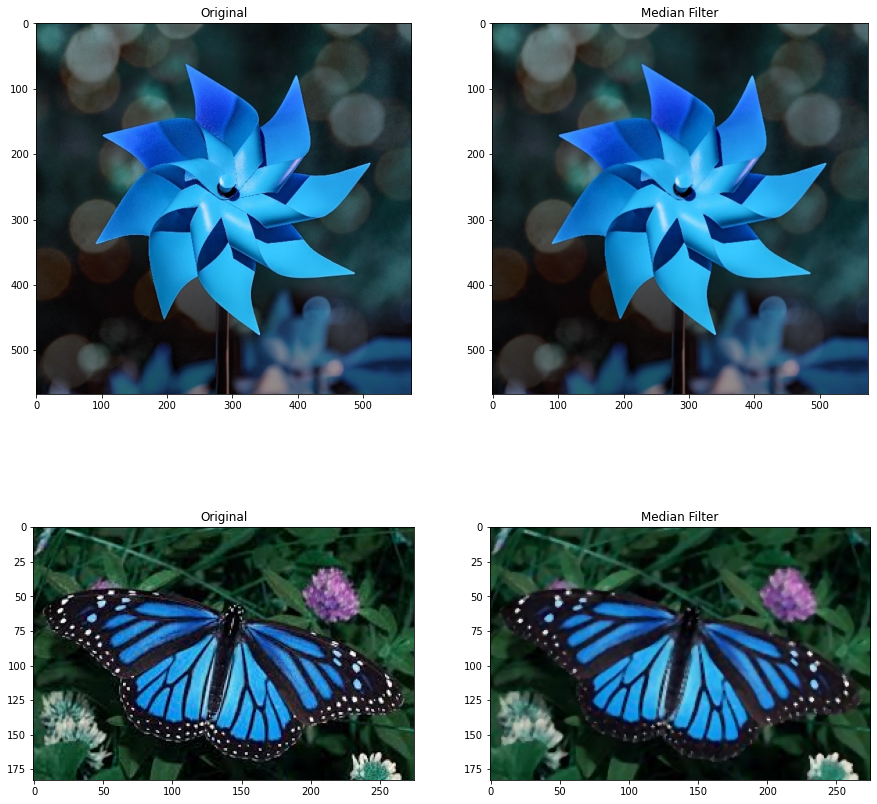

In [476]:
#First Image Box filter application
blur1_box = cv2.medianBlur(images_rgb[4],3) #Box filter
blur2_box = cv2.medianBlur(images_rgb[8],3) #Box filter

fig, axis = plt.subplots(2, 2, figsize=(15, 15))
axis[0][0].title.set_text('Original')
axis[0][0].imshow(images_rgb[4])
axis[0][1].title.set_text('Median Filter')
axis[0][1].imshow(blur1_box)
axis[1][0].title.set_text('Original')
axis[1][0].imshow(images_rgb[8])
axis[1][1].title.set_text('Median Filter')
axis[1][1].imshow(blur2_box)
plt.show()

## 5 Mesh Plots

# Task 6

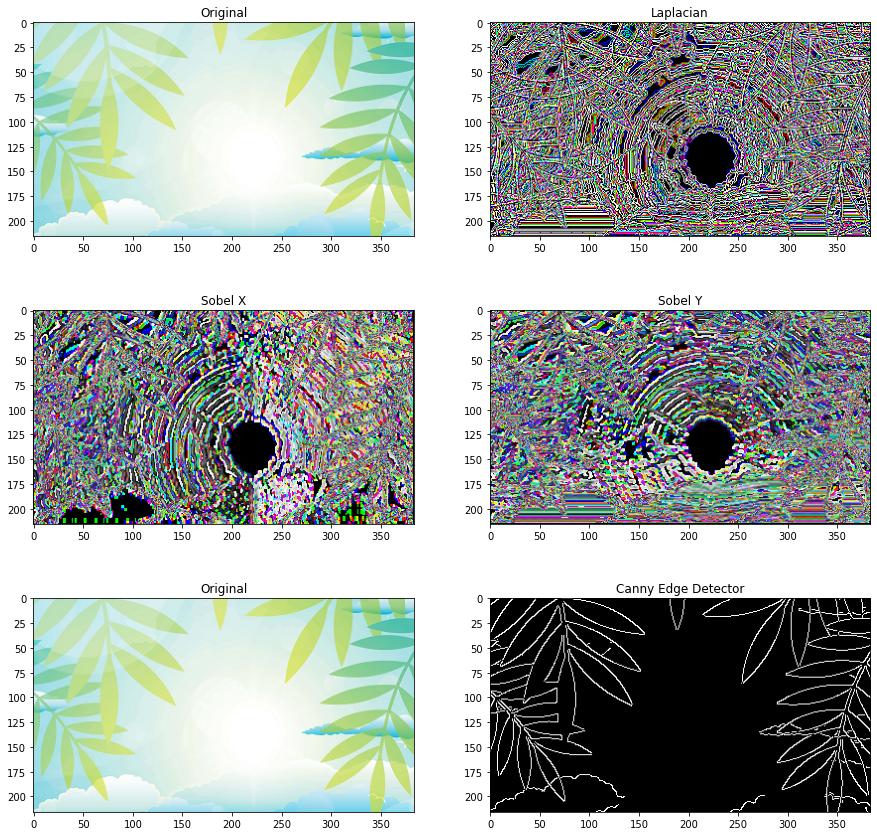

In [475]:
img = images_rgb[2]
laplacian = cv2.Laplacian(img,cv2.CV_64F)           #laplacian
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)      #sobelX
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)      #sobelY

edges = cv.Canny(img,100,200)    #Canny Edge Detector

fig, axis = plt.subplots(3, 2, figsize=(15, 15))
axis[0][0].title.set_text('Original')
axis[0][0].imshow(cv2.cvtColor(img.astype('uint8'),cv2.COLOR_BGR2RGB))
axis[0][1].title.set_text('Laplacian')
axis[0][1].imshow(cv2.cvtColor(laplacian.astype('uint8'),cv2.COLOR_BGR2RGB))
axis[1][0].title.set_text('Sobel X')
axis[1][0].imshow(cv2.cvtColor(sobelx.astype('uint8'),cv2.COLOR_BGR2RGB))
axis[1][1].title.set_text('Sobel Y')
axis[1][1].imshow(cv2.cvtColor(sobely.astype('uint8'),cv2.COLOR_BGR2RGB))
axis[2][0].title.set_text('Original')
axis[2][0].imshow(cv2.cvtColor(img.astype('uint8'),cv2.COLOR_BGR2RGB))
axis[2][1].title.set_text('Canny Edge Detector')
axis[2][1].imshow(cv2.cvtColor(edges.astype('uint8'),cv2.COLOR_BGR2RGB))
plt.show()